### Singular Value Decomposition Notes
Code examples from [andrew.gibiansky.com tutorial](http://andrew.gibiansky.com/blog/mathematics/cool-linear-algebra-singular-value-decomposition/)

In [60]:
%matplotlib inline 

####Step 1: Load an image and show it in grayscale

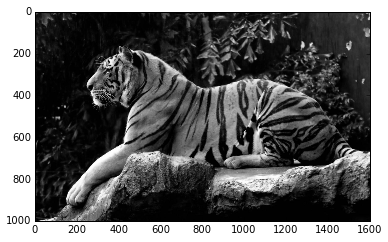

In [61]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt

tiger = misc.imread('tiger.jpg', flatten=True)

def show_grayscale(values):
    plt.gray()
    plt.imshow(values)
    plt.show()

show_grayscale(tiger)

####Step 2: Compute the SVD, observe the scale of the components, most of the information is in the largest singular values.

U, V, s: (1000L, 1000L) (1000L, 1600L) (1000L,)


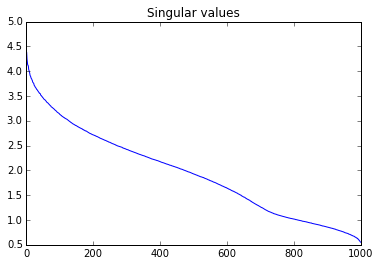

In [66]:
from scipy import linalg
import numpy as np

U, s, Vh = linalg.svd(tiger, full_matrices=0)

print "U, V, s:", U.shape, Vh.shape, s.shape
plt.plot(np.log10(s))
plt.title("Singular values")
plt.show()

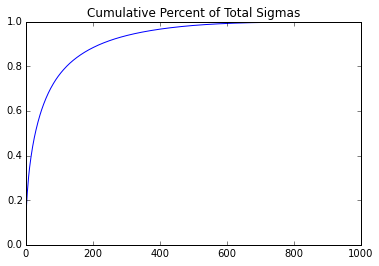

In [67]:
s_sum=sum(s)
s_cumsum=np.cumsum(s)
s_cumsum_norm=s_cumsum / s_sum
plt.title('Cumulative Percent of Total Sigmas')
plt.plot(s_cumsum_norm)
plt.ylim(0,1)
plt.show()

####Step 3: Generate some compressed images using SVD!
The higher values of `s` in the SVD correspond to the "more important" subcomponents of the image. We can remove some of the less important stuff and 

In [59]:
def approx_image(U, s, Vh, rank):
    """ 
    U: first argument from scipy.slinalg.svd output
    s: second argument from scipy.slinalg.svd output. The diagonal elements.
    Vh: third argument from scipy.slinalg.svd output
    """
    
    approx_sigma = s
    approx_sigma[rank:] = 0
    approx_S = np.diag(approx_sigma)
    approx_tiger = U.dot(approx_S).dot(Vh)    
    return approx_tiger

U, s, Vh = linalg.svd(tiger, full_matrices=0)
ranks = [1000, 100, 50, 10]

for i, rank in enumerate(ranks):
    plt.subplot(2, 2, i + 1)
    plt.title("Approximation Rank %d" % rank)

    approx_tiger = approx_image(U, s, Vh, rank)
    plt.gray()
    plt.imshow(approx_tiger)
plt.show()
